In [1]:
# --------------------------------------------------------------------------

# ----------------- results d0005 for chemometrica 2019 journal paper

# -------------------------------------------------------------------------


# ¡¡¡ --- !!! # ---> modules and data cases

# --- system modules

import sys
import datetime
import os

#base_dir = "C:/Users/u0106869/Google Drive/kul_phd/conferences/chemometrica-2019/paper/chemometrica2019_conference_paper_codes_submission02"
base_dir = "/home/valeria/vfonsecad/kul_phd/conferences/chemometrica-2019/paper/chemometrica2019_conference_paper_codes_submission02"


# --- data handling modules

import numpy as np
import pandas as pd
import scipy.io as sp_io

# --- visualization modules

import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
import seaborn as sns
import imageio
from matplotlib.cm import ScalarMappable
from matplotlib import rcParams
import matplotlib as mtply


# --- my modules

methods_dir = base_dir + '/methods/python'  
sys.path.insert(0, methods_dir + '/model_building')
sys.path.insert(0, methods_dir + '/read_data')
from class_chemometrics_data import chemometrics_data
from class_weighted_mcesimpls import weighted_mcesimpls, weighted_mcesimpls_sklearn




# ¡¡¡ --- !!! # ---> base working directory and available data cases


# ************************************ init --- user 
cases_dict = {"d0005": ["d0005_milkrobot_visnir2010", "trans_lactose_robpca_data_prepared"]}
# ************************************ end --- user 


print("--------- imports loaded ----------")




# ¡¡¡ --- !!! # ---> data


# ************************************ init --- user 
caseID_key = "d0005"
# ************************************ end --- user 

case_dir = cases_dict[caseID_key][0]
dname = cases_dict[caseID_key][1]
data_dir = '/data/' + case_dir + '/data_prepared/'
output_dir = base_dir + '/output/'





# ************************************ init --- user
data_class = chemometrics_data(base_dir + data_dir + dname + '.mat', 
                               data_identifier = data_dir + dname,
                               include_val = True,
                               include_test = False,
                               include_unlabeled = False,
                               y_all_range = False, 
                               y_range = np.array([2]))
# ************************************ end --- user





print("--------- data loaded for " + data_class.data_identifier + "----------")






--------- imports loaded ----------
--------- data loaded for /data/d0005_milkrobot_visnir2010/data_prepared/trans_lactose_robpca_data_prepared!*Lactose*!----------


ycal mean:  [4.60695835]
ycal std:  [0.34350084]
---
yval mean:  [4.65800003]
yval std:  [0.25015861]
---


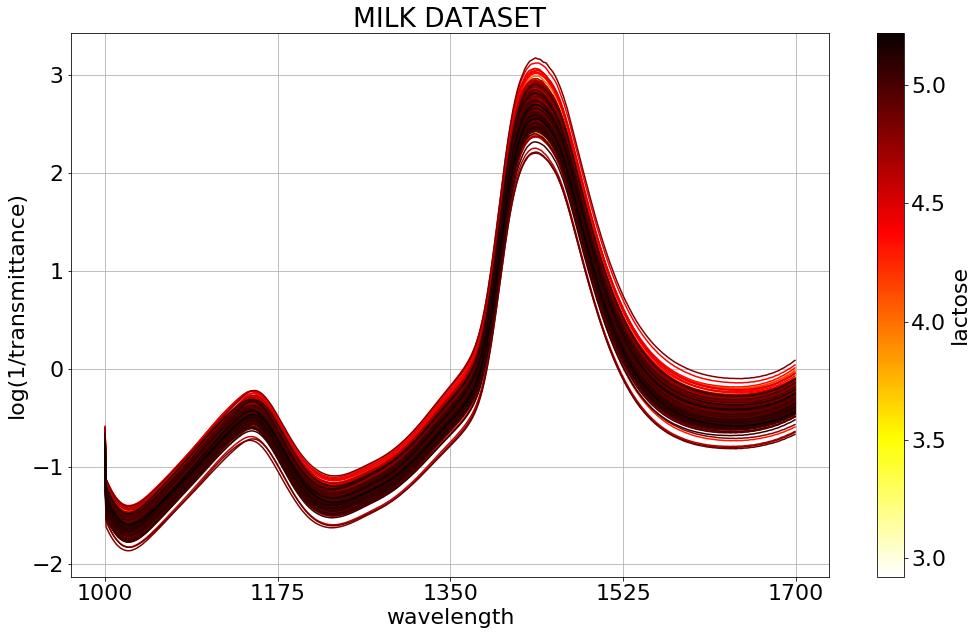

In [2]:
# ¡¡¡ --- !!! # ---> descriptive statistics and data plots


# ************************************ init --- user 

y_column_id = 1 # used for colormap in plot
spectral_measurements_title = "log(1/transmittance)"
wavelength_min = 1000
wavelength_max = 1700
n_wavelength_ticks = 5

# ************************************ end --- user 


# --- descriptive statistics 
print("ycal mean: " , data_class.get_cal()["ycal"].mean(axis=0))
print("ycal std: " , data_class.get_cal()["ycal"].std(axis=0))
print("---")

if 'val' in data_class.data_included:
    print("yval mean: " , data_class.get_val()["yval"].mean(axis=0))
    print("yval std: " , data_class.get_val()["yval"].std(axis=0))
    print("---")

if 'test' in data_class.data_included:
    print("ytest mean: " , data_class.get_test()["ytest"].mean(axis=0))
    print("ytest std: " , data_class.get_test()["ytest"].std(axis=0))
    print("---")
    

# --- spectral plot


plt.rcParams.update({'font.size': 22}) 
xticks_labels = np.rint(np.linspace(wavelength_min,wavelength_max,n_wavelength_ticks))
xticks_labels = xticks_labels.astype(int)


    # --- colormap 
    
c_m = mtply.cm.hot_r
norm = mtply.colors.Normalize(vmin = np.amin(data_class.get_cal()["ycal"][:,[y_column_id-1]]), vmax = np.amax(data_class.get_cal()["ycal"][:,[y_column_id-1]]))
s_m = mtply.cm.ScalarMappable(cmap = c_m, norm = norm)
s_m.set_array([])

    # --- plot

fig, ax = plt.subplots(figsize = (17,10), facecolor="white")
for ii in np.argsort(data_class.get_cal()["ycal"][:,0]):
    plt.plot(data_class.get_cal()["xcal"][[ii],:].T,color=s_m.to_rgba(data_class.get_cal()["ycal"][ii,y_column_id-1]))
plt.title("MILK DATASET")
plt.xlabel("wavelength")
plt.ylabel(spectral_measurements_title)
plt.xticks(np.rint(np.linspace(0,data_class.K,n_wavelength_ticks)), xticks_labels)
plt.grid()
clb = plt.colorbar(s_m)
clb.set_label(data_class.y_names[y_column_id - 1].lower())
#plt.show() 
plt.savefig(output_dir + 'figures/fig_' + case_dir + '01_spectra.png', format='png',bbox_inches = 'tight')


In [3]:
# ¡¡¡ --- !!! # ---> results of tuning for all models

tuning_results = {}
print("ready")

ready


In [9]:
# ¡¡¡ --- !!! # ---> tuning for W.MCESIMPLS

#cont = input("Start?   ")
print("\n start time:---", datetime.datetime.now(), "\n")


# ************************************ init --- user 
total_ncp = 20
sigma_min = 0.2
sigma_max = 4
total_sigmas = 30
kfold_splits = 10
current_V = None
maximum_iters  = 30

# ************************************ end --- user 





range_ncp = np.arange(1, total_ncp+1)
sigma_range = np.linspace(sigma_min, sigma_max, total_sigmas)
val_error_matrix = np.zeros((total_ncp,sigma_range.shape[0]))
cv_error_matrix = np.zeros((total_ncp,sigma_range.shape[0]))


ssi = 0

for sigma_i in sigma_range:
    
    for current_ncp in range_ncp:  
        
        # --- model object
        
        my_weighted_mcesimpls = weighted_mcesimpls(data_class.get_cal()["xcal"],data_class.get_cal()["ycal"], current_ncp, "my_weighted_mcesimpls")

        # --- training model

        try:
            

            my_weighted_mcesimpls_trained = my_weighted_mcesimpls.train(iters=maximum_iters, current_v0=current_V, 
                                                                            factor_sigma=sigma_i,  robpca_check = False)
            # --- Sample weights

            my_weighted_mcesimpls_sample_weights  = np.diag(my_weighted_mcesimpls_trained["sample_weights"])
            my_weighted_mcesimpls_sample_weights.shape = (data_class.ncal,1)

            # --- cv    

            my_weighted_mcesimpls_cv_pred = my_weighted_mcesimpls.crossval_KFold(my_weighted_mcesimpls_trained['trainObject'],number_splits=kfold_splits)
            my_weighted_mcesimpls_cv_error = my_weighted_mcesimpls.rmse(my_weighted_mcesimpls_cv_pred['cvPredicted'], data_class.get_cal()["ycal"],my_weighted_mcesimpls_sample_weights)

            # --- val    

            yval_pred_weighted_mcesimpls = my_weighted_mcesimpls.predict(data_class.get_val()["xval"],my_weighted_mcesimpls_trained)
            my_weighted_mcesimpls_val_error = my_weighted_mcesimpls.rmse(yval_pred_weighted_mcesimpls, data_class.get_val()["yval"])

        except np.linalg.LinAlgError:
            

            my_weighted_mcesimpls_cv_error = None
            my_weighted_mcesimpls_val_error = None



        # --- Store error 


        val_error_matrix[current_ncp-1,ssi] = my_weighted_mcesimpls_val_error
        cv_error_matrix[current_ncp-1,ssi] = my_weighted_mcesimpls_cv_error

    ssi += 1
    print(ssi)
        
    
tuning_results["wmcesimpls"] = {"cv_error": cv_error_matrix,
                                "val_error": val_error_matrix,
                                "sigma_range": sigma_range
                                }




print("\n finish time:---", datetime.datetime.now())


 start time:--- 2019-12-11 12:06:26.007854 

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30

 finish time:--- 2019-12-11 13:17:48.000791


In [4]:
# ¡¡¡ --- !!! # ---> tuning for SIMPLS

#cont = input("Start?   ")
print("\n start time:---", datetime.datetime.now(), "\n")


# ************************************ init --- user 
total_ncp = 20
kfold_splits = 10
# ************************************ end --- user 



range_ncp = np.arange(1, total_ncp+1)
val_error_matrix = np.zeros((total_ncp,1))
cv_error_matrix = np.zeros((total_ncp,1))


ssi = 0


    
for current_ncp in range_ncp:  
        
    # --- model object
        
    my_simpls = weighted_mcesimpls(data_class.get_cal()["xcal"],data_class.get_cal()["ycal"], current_ncp, "my_simpls")

    # --- training model

    try:
            

        my_simpls_trained = my_simpls.train(iters=0, current_v0=None, robpca_check = False)
            
        # --- Sample weights

        my_simpls_sample_weights  = np.diag(my_simpls_trained["sample_weights"])
        my_simpls_sample_weights.shape = (data_class.ncal,1)

        # --- cv    

        my_simpls_cv_pred = my_simpls.crossval_KFold(my_simpls_trained['trainObject'],number_splits=kfold_splits)
        my_simpls_cv_error = my_simpls.rmse(my_simpls_cv_pred['cvPredicted'], data_class.get_cal()["ycal"],my_simpls_sample_weights)

        # --- val    

        yval_pred_simpls = my_simpls.predict(data_class.get_val()["xval"],my_simpls_trained)
        my_simpls_val_error = my_simpls.rmse(yval_pred_simpls, data_class.get_val()["yval"])

    except np.linalg.LinAlgError:
            

        my_simpls_cv_error = None
        my_simpls_val_error = None



    # --- Store error 


    val_error_matrix[current_ncp-1,ssi] = my_simpls_val_error
    cv_error_matrix[current_ncp-1,ssi] = my_simpls_cv_error


    
        
    
tuning_results["simpls"] = {"cv_error": cv_error_matrix,
                             "val_error": val_error_matrix}




print("\n finish time:---", datetime.datetime.now())


 start time:--- 2019-12-11 12:04:04.324904 


 finish time:--- 2019-12-11 12:04:13.339909


[0.2  0.33 0.46 0.59 0.72 0.86 0.99 1.12 1.25 1.38 1.51 1.64 1.77 1.9
 2.03 2.17 2.3  2.43 2.56 2.69 2.82 2.95 3.08 3.21 3.34 3.48 3.61 3.74
 3.87 4.  ]


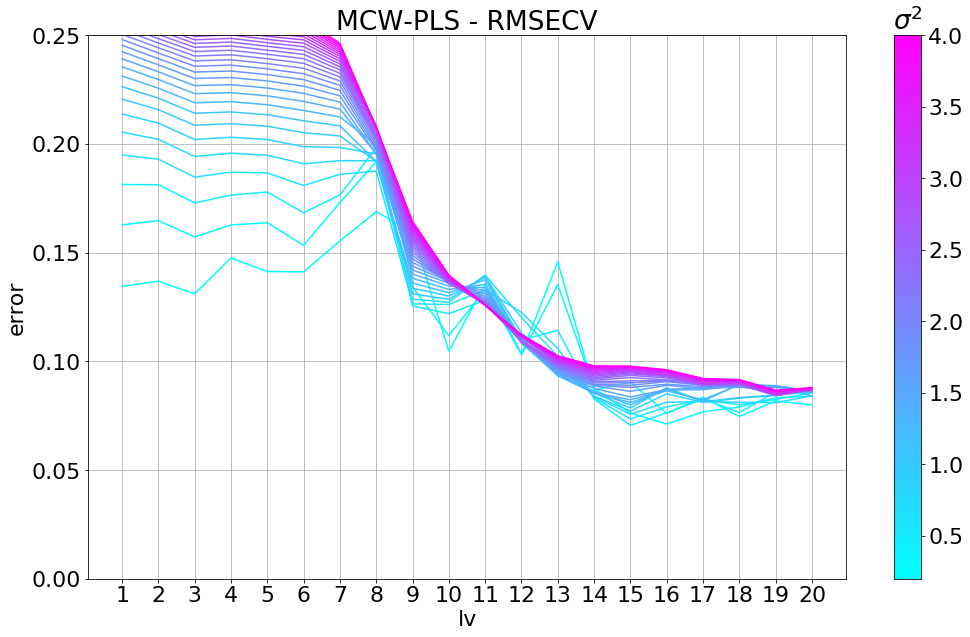

In [33]:
# ¡¡¡ --- !!! # ---> plots of cv WMCESIMPLS

print(np.round(tuning_results["wmcesimpls"]["sigma_range"],2))

plt.rcParams.update({'font.size': 22}) 


    # --- colormap 
    
c_m = mtply.cm.cool
norm = mtply.colors.Normalize(vmin = np.amin(tuning_results["wmcesimpls"]["sigma_range"]),
                              vmax = np.amax(tuning_results["wmcesimpls"]["sigma_range"]))
s_m = mtply.cm.ScalarMappable(cmap = c_m, norm = norm)
s_m.set_array([])

    # --- plot

fig, ax = plt.subplots(figsize = (17,10), facecolor="white")
for ii in range(0,tuning_results["wmcesimpls"]["cv_error"].shape[1]):
#for ii in range(20,30):
    plt.plot(tuning_results["wmcesimpls"]["cv_error"][:,ii],color=s_m.to_rgba(tuning_results["wmcesimpls"]["sigma_range"][ii]))
plt.title("MCW-PLS - RMSECV")
plt.xlabel("lv")
plt.ylabel("error")
plt.ylim([0,0.25])
plt.xticks(np.arange(0,tuning_results["wmcesimpls"]["cv_error"].shape[0]), np.arange(1,tuning_results["wmcesimpls"]["cv_error"].shape[0]+1).astype(int))
plt.grid()
clb = plt.colorbar(s_m)
clb.ax.set_title("$\sigma^2$")
#plt.show() 
plt.savefig(output_dir + 'figures/fig_' + case_dir + '02_rmsecv_wmcesimpls.png', format='png',bbox_inches = 'tight')


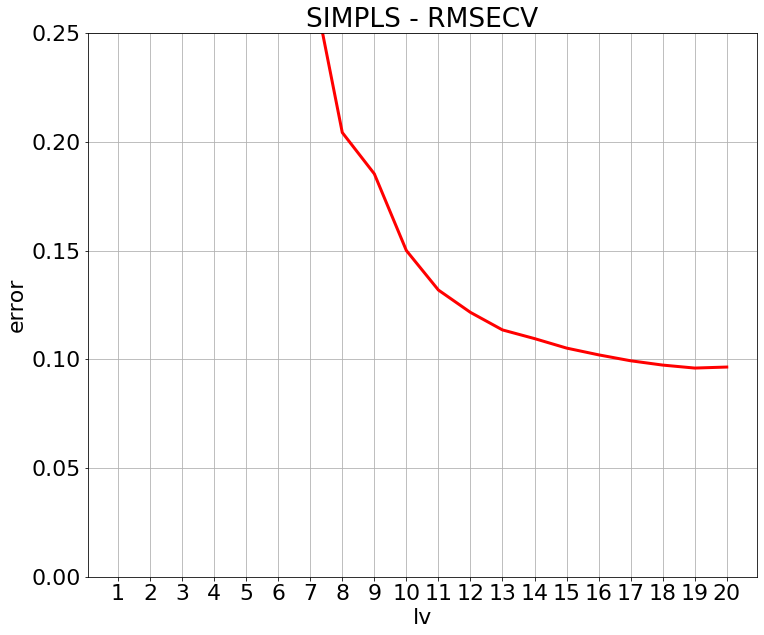

In [5]:
# ¡¡¡ --- !!! # ---> plots of cv SIMPLS


plt.rcParams.update({'font.size': 22}) 

    # --- plot

fig, ax = plt.subplots(figsize = (12,10), facecolor="white")
for ii in range(tuning_results["simpls"]["cv_error"].shape[1]):
    plt.plot(tuning_results["simpls"]["cv_error"][:,ii],color="red", linewidth=3)
plt.title("SIMPLS - RMSECV")
plt.xlabel("lv")
plt.ylabel("error")
plt.ylim([0,0.25])
plt.xticks(np.arange(0,tuning_results["simpls"]["cv_error"].shape[0]), np.arange(1,tuning_results["simpls"]["cv_error"].shape[0]+1).astype(int))
plt.grid()
#plt.show() 
plt.savefig(output_dir + 'figures/fig_' + case_dir + '02_rmsecv_simpls.png', format='png',bbox_inches = 'tight')



In [2]:
# ¡¡¡ --- !!! # ---> selected models for all algorithms

selected_models = {}

print("ready")

ready


In [3]:
# ¡¡¡ --- !!! # ---> selected models W.MCESIMPLS


# ************************************ init --- user 
selected_models["wmcesimpls"] = {"model_01": {"ncp": 15, "sigma2":0.6},
                                 "model_02": {"ncp": 15, "sigma2":1.5},
                                 "model_03": {"ncp": 19, "sigma2":2},
                                 "model_04": {"ncp": 19, "sigma2":3},
                                 "model_05": {"ncp": 19, "sigma2":4}}
kfold_splits = 10
current_V = None
maximum_iters  = 30

# ************************************ end --- user 



for model_i in selected_models["wmcesimpls"].keys():
    
    
          
        # --- model object
        
    my_weighted_mcesimpls = weighted_mcesimpls(data_class.get_cal()["xcal"],data_class.get_cal()["ycal"], selected_models["wmcesimpls"][model_i]["ncp"], "my_weighted_mcesimpls")

        # --- training model

    try:
        
        my_weighted_mcesimpls_trained = my_weighted_mcesimpls.train(iters=maximum_iters, current_v0=current_V, 
                                                                    factor_sigma=selected_models["wmcesimpls"][model_i]["sigma2"],  robpca_check = False)
            # --- Sample weights

        my_weighted_mcesimpls_sample_weights  = np.diag(my_weighted_mcesimpls_trained["sample_weights"])
        my_weighted_mcesimpls_sample_weights.shape = (data_class.ncal,1)

            # --- cv    

        my_weighted_mcesimpls_cv_pred = my_weighted_mcesimpls.crossval_KFold(my_weighted_mcesimpls_trained['trainObject'],number_splits=kfold_splits)
        my_weighted_mcesimpls_cv_error = my_weighted_mcesimpls.rmse(my_weighted_mcesimpls_cv_pred['cvPredicted'], data_class.get_cal()["ycal"],my_weighted_mcesimpls_sample_weights)
        my_weighted_mcesimpls_cv_r2 = my_weighted_mcesimpls.r2(my_weighted_mcesimpls_cv_pred['cvPredicted'], data_class.get_cal()["ycal"],my_weighted_mcesimpls_sample_weights)

            # --- val    

        yval_pred_weighted_mcesimpls = my_weighted_mcesimpls.predict(data_class.get_val()["xval"],my_weighted_mcesimpls_trained)
        my_weighted_mcesimpls_val_error = my_weighted_mcesimpls.rmse(yval_pred_weighted_mcesimpls, data_class.get_val()["yval"])
        my_weighted_mcesimpls_val_r2 = my_weighted_mcesimpls.r2(yval_pred_weighted_mcesimpls, data_class.get_val()["yval"])
    
    except np.linalg.LinAlgError:
        
        my_weighted_mcesimpls_cv_error = None
        my_weighted_mcesimpls_val_error = None
    
    selected_models["wmcesimpls"][model_i]["rmsecv"] = my_weighted_mcesimpls_cv_error[0]
    selected_models["wmcesimpls"][model_i]["r2cv"] = my_weighted_mcesimpls_cv_r2[0]
    selected_models["wmcesimpls"][model_i]["rmsep"] = my_weighted_mcesimpls_val_error[0]
    selected_models["wmcesimpls"][model_i]["r2p"] = my_weighted_mcesimpls_val_r2[0]
    selected_models["wmcesimpls"][model_i]["trained"] = my_weighted_mcesimpls_trained
    selected_models["wmcesimpls"][model_i]["sample_weights"] = my_weighted_mcesimpls_sample_weights
    selected_models["wmcesimpls"][model_i]["cv_predicted"] = my_weighted_mcesimpls_cv_pred['cvPredicted']
    selected_models["wmcesimpls"][model_i]["val_predicted"] = yval_pred_weighted_mcesimpls
                                           
    
    print(model_i)

print("finished")

model_01
model_02
model_03
model_04
model_05
finished


In [4]:
# ¡¡¡ --- !!! # ---> selected models SIMPLS


# ************************************ init --- user 

selected_models["simpls"] = {"model_01": {"ncp": 19}}
kfold_splits = 10

# ************************************ end --- user 



for model_i in selected_models["simpls"].keys():
    
    
          
        # --- model object
        
    my_simpls = weighted_mcesimpls(data_class.get_cal()["xcal"],data_class.get_cal()["ycal"], selected_models["simpls"][model_i]["ncp"], "my_simpls")

        # --- training model

    try:
        
        
        my_simpls_trained = my_simpls.train(iters=0, current_v0=None, robpca_check = False)
            
            # --- Sample weights

        my_simpls_sample_weights  = np.diag(my_simpls_trained["sample_weights"])
        my_simpls_sample_weights.shape = (data_class.ncal,1)

            # --- cv    

        my_simpls_cv_pred = my_simpls.crossval_KFold(my_simpls_trained['trainObject'],number_splits=kfold_splits)
        my_simpls_cv_error = my_simpls.rmse(my_simpls_cv_pred['cvPredicted'], data_class.get_cal()["ycal"],my_simpls_sample_weights)
        my_simpls_cv_r2 = my_simpls.r2(my_simpls_cv_pred['cvPredicted'], data_class.get_cal()["ycal"],my_simpls_sample_weights)

            # --- val    

        yval_pred_simpls = my_simpls.predict(data_class.get_val()["xval"],my_simpls_trained)
        my_simpls_val_error = my_simpls.rmse(yval_pred_simpls, data_class.get_val()["yval"])
        my_simpls_val_r2 = my_simpls.r2(yval_pred_simpls, data_class.get_val()["yval"])

    except np.linalg.LinAlgError:
                   

        my_simpls_cv_error = None
        my_simpls_val_error = None
    
    selected_models["simpls"][model_i]["rmsecv"] = my_simpls_cv_error[0]
    selected_models["simpls"][model_i]["r2cv"] = my_simpls_cv_r2[0]
    selected_models["simpls"][model_i]["rmsep"] = my_simpls_val_error[0]
    selected_models["simpls"][model_i]["r2p"] = my_simpls_val_r2[0]
    selected_models["simpls"][model_i]["trained"] = my_simpls_trained
    selected_models["simpls"][model_i]["sample_weights"] = my_simpls_sample_weights
    selected_models["simpls"][model_i]["cv_predicted"] = my_simpls_cv_pred['cvPredicted']
    selected_models["simpls"][model_i]["val_predicted"] = yval_pred_simpls

    print(model_i)

print("finished")

model_01
finished


In [5]:
# ¡¡¡ --- !!! # ---> selected models table


empty_line = {"algorithm": [], "model_id": [], "ncp": [], "sigma2": [], "h":[] , "rmsecv":[], "r2cv": [], "rmsep":[], "r2p":[]}
selected_models_table = pd.DataFrame(data=empty_line)


for alg_i in selected_models.keys():
    
    for model_i in selected_models[alg_i].keys():
                
        new_line = {"algorithm": alg_i, "model_id" : model_i}
        
        for key_i in selected_models[alg_i][model_i].keys():
            if key_i in ["ncp", "sigma2", "rmsecv", "r2cv", "rmsep", "r2p"]:
                new_line.update({key_i:selected_models[alg_i][model_i][key_i]})

        selected_models_table = selected_models_table.append(new_line,ignore_index=True)

selected_models_table

algorithm  model_id   ncp  sigma2   h    rmsecv      r2cv     rmsep  \
0  wmcesimpls  model_01  15.0     0.6 NaN  0.073642  0.955060  0.102417   
1  wmcesimpls  model_02  15.0     1.5 NaN  0.083495  0.940932  0.094113   
2  wmcesimpls  model_03  19.0     2.0 NaN  0.085961  0.936768  0.100187   
3  wmcesimpls  model_04  19.0     3.0 NaN  0.084623  0.937936  0.094915   
4  wmcesimpls  model_05  19.0     4.0 NaN  0.086760  0.934531  0.092351   
5      simpls  model_01  19.0     NaN NaN  0.095997  0.922397  0.084749   

        r2p  
0  0.847650  
1  0.868417  
2  0.858037  
3  0.867678  
4  0.874004  
5  0.893205

In [6]:
# ¡¡¡ --- !!! # ---> select one model from the table

one_selected_model = selected_models_table.iloc[1,:]

current_model_all_results = selected_models[one_selected_model["algorithm"]][one_selected_model["model_id"]]

print("ready")


current_model_all_results.keys()

ready


dict_keys(['ncp', 'sigma2', 'rmsecv', 'r2cv', 'rmsep', 'r2p', 'trained', 'sample_weights', 'cv_predicted', 'val_predicted'])

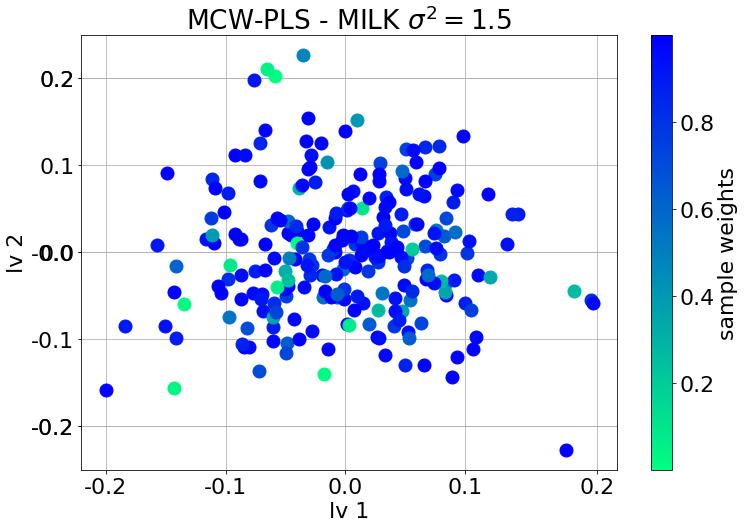

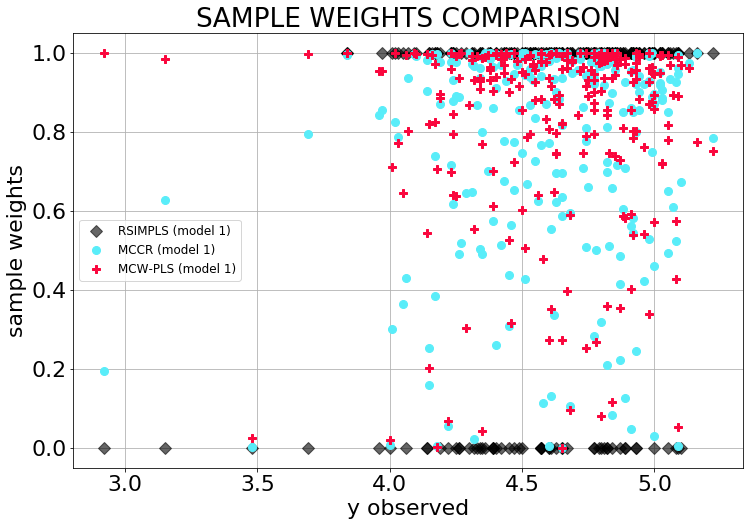

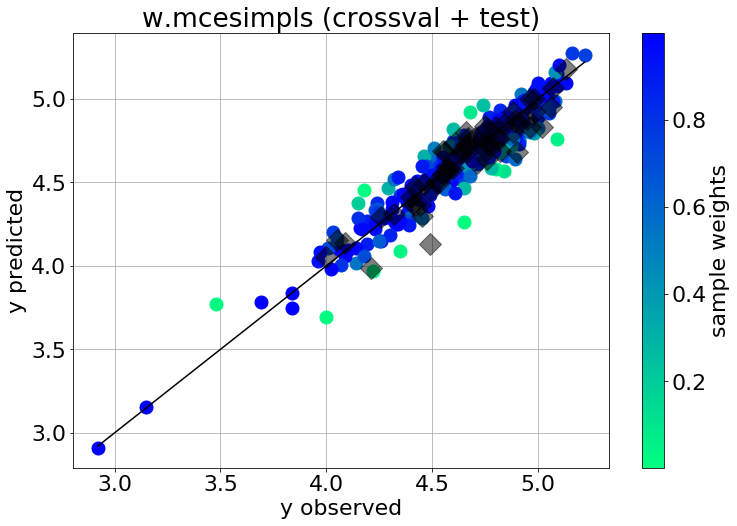

NameError: name 'xticks_labels' is not defined

In [8]:
# ¡¡¡ --- !!! # ---> one selected model scores 2D plot and predicted values plot


plt.rcParams.update({'font.size': 22}) 

color_var_dict = {"weights_i": [mtply.cm.winter, current_model_all_results["sample_weights"], "weights"],
    "weights": [mtply.cm.winter_r, current_model_all_results["sample_weights"], "weights"]}

if one_selected_model["algorithm"] == "simpls":
    x_scores_title = "SIMPLS - MILK"
    color_var_name = "weights_i"

else:
    x_scores_title = "MCW-PLS - MILK " +  "$\sigma^2=$" + str(current_model_all_results["sigma2"]) 
    color_var_name = "weights"





xx_T = current_model_all_results["trained"]["x_scores"]


min_hor = np.amin(xx_T[:,0])
max_hor = np.amax(xx_T[:,0])

min_ver = np.amin(xx_T[:,1])
max_ver = np.amax(xx_T[:,1])



color_var = color_var_dict[color_var_name][1]

# choose a colormap
c_m = color_var_dict[color_var_name][0]
norm = mtply.colors.Normalize(
    vmin=np.amin(color_var),
    vmax=np.amax(color_var))

# create a ScalarMappable and initialize a data structure
s_m = mtply.cm.ScalarMappable(cmap=c_m, norm=norm)
s_m.set_array([])

# --- scores plot

fig, ax = plt.subplots(figsize = (12,8), facecolor="white")
for ii in range(xx_T.shape[0]):
    plt.plot(xx_T[[ii],0],xx_T[[ii],1], 'o',color=s_m.to_rgba(color_var[ii,0]),markersize = 13)
plt.title(x_scores_title)
plt.xlabel("lv 1")
plt.xticks(np.round(np.linspace(min_hor, max_hor, 5),2),np.round(np.linspace(min_hor, max_hor, 5),1))
plt.yticks(np.round(np.linspace(min_ver, max_ver, 8),1),np.round(np.linspace(min_ver, max_ver, 8),1))
plt.ylabel("lv 2")
plt.grid()
clb = plt.colorbar(s_m)
clb.set_label("sample weights")
plt.show() 


# --- weights plot

rsimpls_sample_weights_mat = sp_io.loadmat(base_dir + data_dir + "rsimpls_model_01_sample_flags.mat")

mccr_sample_weights_mat = sp_io.loadmat(base_dir + data_dir + 'mccr_model_01_sample_weights' + '.mat')

plt.rcParams.update({'font.size': 22}) 
fig, ax = plt.subplots(figsize = (12,8), facecolor="white")
plt.plot(data_class.get_cal()["ycal"][:,0],rsimpls_sample_weights_mat["sample_weights"][:,0], 'D',color="black",markersize = 8, label = "RSIMPLS (model 1)", alpha = 0.6)
plt.plot(data_class.get_cal()["ycal"][:,0],mccr_sample_weights_mat["sample_weights"][:,0], 'o',color="#59EDF9",markersize = 8, label = "MCCR (model 1)", alpha = 1)
plt.plot(data_class.get_cal()["ycal"][:,0],current_model_all_results["sample_weights"][:,0], 'P',color="#FA063D",markersize = 8, label = "MCW-PLS (model 1)", alpha = 1)
plt.xlabel("y observed")
plt.ylabel("sample weights")
plt.title("SAMPLE WEIGHTS COMPARISON")
plt.grid()
plt.legend(fontsize = 12, loc = "center left")
#plt.show()
plt.savefig(output_dir + 'figures/fig_' + case_dir + '03_sample_weights_comparison.png', format='png',bbox_inches = 'tight')




# --- predicted values plot

fig, ax = plt.subplots(figsize = (12,8), facecolor="white")
for ii in range(data_class.ncal):
    plt.plot(data_class.get_cal()["ycal"][ii,0], current_model_all_results["cv_predicted"][ii,0], 'o',color=s_m.to_rgba(color_var[ii,0]),markersize = 13)
plt.plot(data_class.get_val()["yval"][:,0],current_model_all_results["val_predicted"] , 'D',color="black",markersize = 15, alpha=0.5, label = "test")
plt.plot([np.amin(data_class.get_cal()["ycal"][:,0]),
          np.amax(data_class.get_cal()["ycal"][:,0])],
         [np.amin(data_class.get_cal()["ycal"][:,0]),
          np.amax(data_class.get_cal()["ycal"][:,0])], c="black")
plt.title("w.mcesimpls (crossval + test)")
plt.xlabel("y observed")
plt.ylabel("y predicted")
plt.grid()
clb = plt.colorbar(s_m)
clb.set_label("sample weights")
plt.show() 


# --- regression vector


xticks_labels = xticks_labels.astype(int)
fig, ax = plt.subplots(figsize = (12,8), facecolor="white")
plt.plot(current_model_all_results["trained"]["BPLS"], linewidth = 4)
plt.title("regression vector")
plt.xlabel("wavelength (nm)")
plt.ylabel("coefficient")
plt.grid()
plt.show()


In [62]:
# ¡¡¡ --- !!! # ---> select samples single models analysis of w.mcesimpls with high-weight samples


sample_proportions = [0.99,0.95,0.90,0.85,0.80,0.70,0.6,0.5]




#  --- subsample selected models table

empty_line = {"algorithm": [], "model_id": [], "ncal": [],"ncp": [], "rmsecv":[], "r2cv":[],"rmsep":[], "r2p":[]}
subsample_models_table = pd.DataFrame(data=empty_line)




#  --- subsample selected model single models analysis of w.mcesimpls with high-weight samples

for ii in range(len(sample_proportions)):
    
    print(ii)
    
    selected_samples = (current_model_all_results["sample_weights"]>=sample_proportions[ii]).flatten()



    my_simpls_subsample = weighted_mcesimpls(data_class.get_cal()["xcal"][selected_samples,:],data_class.get_cal()["ycal"][selected_samples,:], 15, "my_subsample_simpls")

      # --- training model

    my_simpls_subsample_trained = my_simpls_subsample.train(iters=0, current_v0=None, robpca_check = False)

        # --- Sample weights

    my_simpls_subsample_weights  = np.diag(my_simpls_subsample_trained["sample_weights"])
    my_simpls_subsample_weights.shape = (selected_samples.sum(),1)

            # --- cv    

    my_simpls_subsample_cv_pred = my_simpls_subsample.crossval_KFold(my_simpls_subsample_trained['trainObject'],number_splits=kfold_splits)
    my_simpls_subsample_cv_error = my_simpls_subsample.rmse(my_simpls_subsample_cv_pred['cvPredicted'], data_class.get_cal()["ycal"][selected_samples,:],my_simpls_subsample_weights)
    my_simpls_subsample_cv_r2 = my_simpls_subsample.r2(my_simpls_subsample_cv_pred['cvPredicted'], data_class.get_cal()["ycal"][selected_samples,:],my_simpls_subsample_weights)

    
    
      # --- val    

    yval_pred_simpls_subsample = my_simpls_subsample.predict(data_class.get_val()["xval"],my_simpls_subsample_trained)
    my_simpls_subsample_val_error = my_simpls_subsample.rmse(yval_pred_simpls_subsample, data_class.get_val()["yval"])
    my_simpls_subsample_val_r2 = my_simpls_subsample.r2(yval_pred_simpls_subsample, data_class.get_val()["yval"])


    new_line = {"algorithm": "simpls", "model_id" : ii}
    new_line["ncal"] =  selected_samples.sum()
    new_line["ncp"] = my_simpls_subsample_trained["x_scores"].shape[1]
    new_line["rmsecv"] = my_simpls_subsample_cv_error[0]
    new_line["r2cv"] = my_simpls_subsample_cv_r2[0]
    new_line["rmsep"] = my_simpls_subsample_val_error[0]
    new_line["r2p"] = my_simpls_subsample_val_r2[0]

    subsample_models_table = subsample_models_table.append(new_line,ignore_index=True)




subsample_models_table

0
1
2
3
4
5
6
7


algorithm  model_id   ncal   ncp    rmsecv      r2cv     rmsep       r2p
0    simpls       0.0   53.0  15.0  0.127304  0.900071  0.124981  0.780672
1    simpls       1.0  104.0  15.0  0.066695  0.969649  0.099352  0.850894
2    simpls       2.0  135.0  15.0  0.055815  0.975265  0.100391  0.848223
3    simpls       3.0  156.0  15.0  0.056364  0.973700  0.099048  0.854586
4    simpls       4.0  170.0  15.0  0.062388  0.967227  0.101369  0.848727
5    simpls       5.0  195.0  15.0  0.063143  0.966371  0.100668  0.851393
6    simpls       6.0  203.0  15.0  0.064957  0.964248  0.103022  0.844477
7    simpls       7.0  215.0  15.0  0.075507  0.951243  0.097214  0.860882

In [58]:
#my_simpls_subsample_cv_pred['cvPredicted'].shape
data_class.get_cal()["ycal"][selected_samples,:].shape
my_simpls_subsample_weights.shape
   

(53, 1)


 finish time:--- 2019-12-11 13:47:48.959923


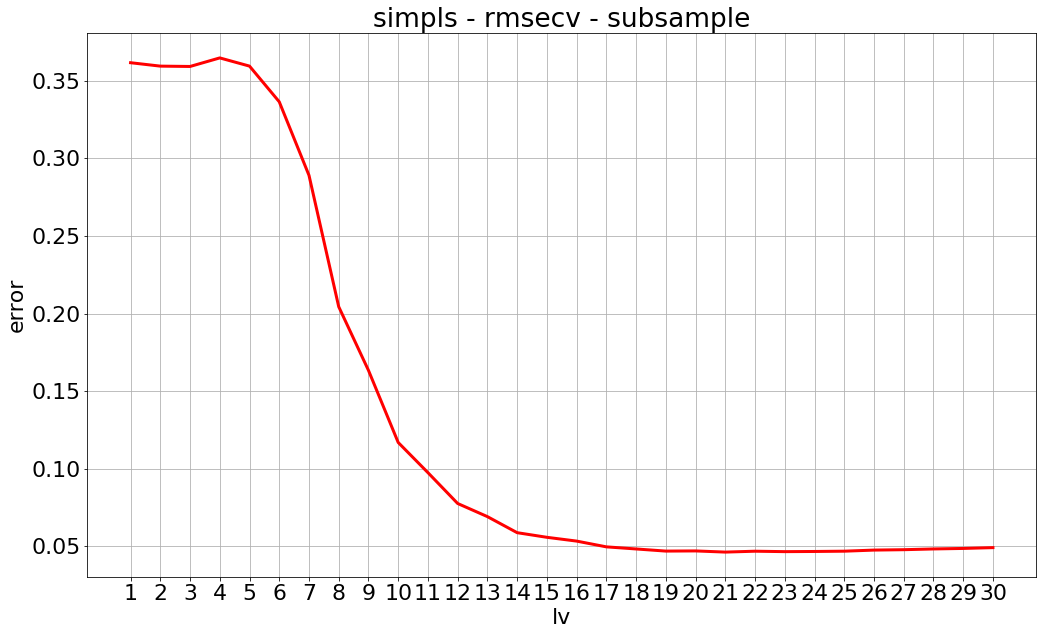

In [51]:
# ¡¡¡ --- !!! # ---> cross val single models analysis of w.mcesimpls with high-weight samples


selected_samples = (current_model_all_results["sample_weights"]>=0.9).flatten()

# ************************************ init --- user 
total_ncp = 30
kfold_splits = 10
# ************************************ end --- user 



range_ncp = np.arange(1, total_ncp+1)
val_error_matrix = np.zeros((total_ncp,1))
cv_error_matrix = np.zeros((total_ncp,1))


ssi = 0


    
for current_ncp in range_ncp:  
        
    # --- model object
        
    my_simpls = weighted_mcesimpls(data_class.get_cal()["xcal"][selected_samples,:],data_class.get_cal()["ycal"][selected_samples,:], current_ncp, "my_simpls")

    # --- training model

    try:
            

        my_simpls_trained = my_simpls.train(iters=0, current_v0=None, robpca_check = False)
            
        # --- Sample weights

        my_simpls_sample_weights  = np.diag(my_simpls_trained["sample_weights"])
        my_simpls_sample_weights.shape = (data_class.get_cal()["xcal"][selected_samples,:].shape[0],1)

        # --- cv    

        my_simpls_cv_pred = my_simpls.crossval_KFold(my_simpls_trained['trainObject'],number_splits=kfold_splits)
        my_simpls_cv_error = my_simpls.rmse(my_simpls_cv_pred['cvPredicted'], data_class.get_cal()["ycal"][selected_samples,:],my_simpls_sample_weights)

        # --- val    

        yval_pred_simpls = my_simpls.predict(data_class.get_val()["xval"],my_simpls_trained)
        my_simpls_val_error = my_simpls.rmse(yval_pred_simpls, data_class.get_val()["yval"])

    except np.linalg.LinAlgError:
            

        my_simpls_cv_error = None
        my_simpls_val_error = None



    # --- Store error 


    val_error_matrix[current_ncp-1,ssi] = my_simpls_val_error
    cv_error_matrix[current_ncp-1,ssi] = my_simpls_cv_error


    
        
    
tuning_results_subsample = {"cv_error": cv_error_matrix,
                             "val_error": val_error_matrix}




print("\n finish time:---", datetime.datetime.now())

plt.rcParams.update({'font.size': 22}) 

    # --- plot

fig, ax = plt.subplots(figsize = (17,10), facecolor="white")
for ii in range(tuning_results_subsample["cv_error"].shape[1]):
    plt.plot(tuning_results_subsample["cv_error"][:,ii],color="red", linewidth=3)
plt.title("simpls - rmsecv - subsample")
plt.xlabel("lv")
plt.ylabel("error")
plt.xticks(np.arange(0,tuning_results_subsample["cv_error"].shape[0]), np.arange(1,tuning_results_subsample["cv_error"].shape[0]+1).astype(int))
plt.grid()
plt.show() 

[0.09726005]
135


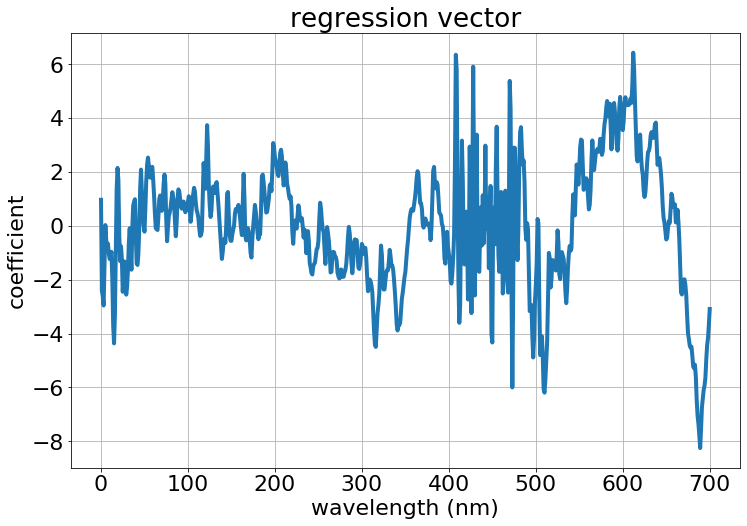

In [52]:
# ¡¡¡ --- !!! # ---> selected model single models analysis of w.mcesimpls with high-weight samples




my_simpls_subsample = weighted_mcesimpls(data_class.get_cal()["xcal"][selected_samples,:],data_class.get_cal()["ycal"][selected_samples,:], 19, "my_subsample_simpls")

  # --- training model

my_simpls_subsample_trained = my_simpls_subsample.train(iters=0, current_v0=None, robpca_check = False)

  # --- val    

yval_pred_simpls_subsample = my_simpls_subsample.predict(data_class.get_val()["xval"],my_simpls_subsample_trained)
my_subsample_simpls_val_error = my_simpls_subsample.rmse(yval_pred_simpls_subsample, data_class.get_val()["yval"])

print(my_subsample_simpls_val_error)
print(selected_samples.sum())

# --- regression vector


xticks_labels = xticks_labels.astype(int)
fig, ax = plt.subplots(figsize = (12,8), facecolor="white")
plt.plot(my_simpls_subsample_trained["BPLS"], linewidth = 4)
plt.title("regression vector")
plt.xlabel("wavelength (nm)")
plt.ylabel("coefficient")
plt.grid()
plt.show()

